In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/nikhilasundar/Downloads/housing.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.isnull().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [30]:
x = df.loc[:,['MedInc','Latitude','Longitude']]

In [6]:
from sklearn.cluster import KMeans

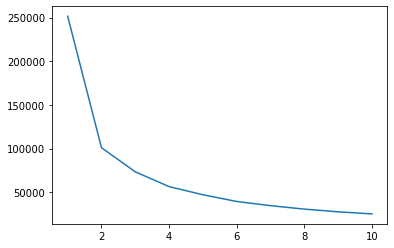

In [7]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [8]:
km = KMeans(n_clusters = 6)
x['cluster'] = km.fit_predict(x)

In [9]:
print(x)

       MedInc  Latitude  Longitude  cluster
0      8.3252     37.88    -122.23        2
1      8.3014     37.86    -122.22        2
2      7.2574     37.85    -122.24        2
3      5.6431     37.85    -122.25        2
4      3.8462     37.85    -122.25        5
...       ...       ...        ...      ...
20635  1.5603     39.48    -121.09        5
20636  2.5568     39.49    -121.21        5
20637  1.7000     39.43    -121.22        5
20638  1.8672     39.43    -121.32        5
20639  2.3886     39.37    -121.24        5

[20640 rows x 4 columns]


In [10]:
x = pd.DataFrame(x)
print(x)
#x['cluster'] = x['cluster'].astype['category']

       MedInc  Latitude  Longitude  cluster
0      8.3252     37.88    -122.23        2
1      8.3014     37.86    -122.22        2
2      7.2574     37.85    -122.24        2
3      5.6431     37.85    -122.25        2
4      3.8462     37.85    -122.25        5
...       ...       ...        ...      ...
20635  1.5603     39.48    -121.09        5
20636  2.5568     39.49    -121.21        5
20637  1.7000     39.43    -121.22        5
20638  1.8672     39.43    -121.32        5
20639  2.3886     39.37    -121.24        5

[20640 rows x 4 columns]


In [11]:
x.head()

,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,5


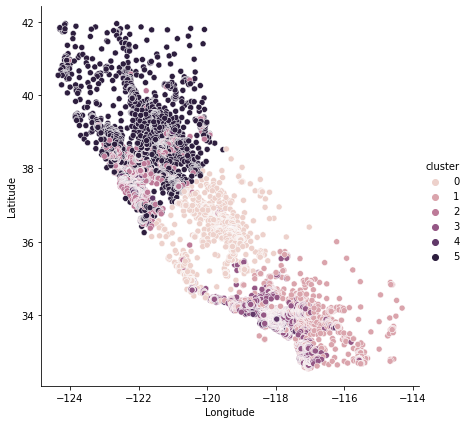

In [12]:
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'cluster', data = x, height = 6)

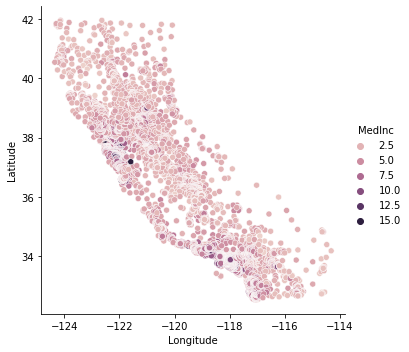

In [13]:
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'MedInc', data = x)

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

KeyboardInterrupt: 

In [31]:
x = x.iloc[:,0:3].values
x.ndim

2

In [18]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 6)
y = ac.fit_predict(x)

In [19]:
print(x)

       MedInc  Latitude  Longitude  cluster
0      8.3252     37.88    -122.23        2
1      8.3014     37.86    -122.22        2
2      7.2574     37.85    -122.24        2
3      5.6431     37.85    -122.25        2
4      3.8462     37.85    -122.25        5
...       ...       ...        ...      ...
20635  1.5603     39.48    -121.09        5
20636  2.5568     39.49    -121.21        5
20637  1.7000     39.43    -121.22        5
20638  1.8672     39.43    -121.32        5
20639  2.3886     39.37    -121.24        5

[20640 rows x 4 columns]


In [25]:
print(y)
x.iloc[:,1]
print(x.ndim)
x.reshape()

[3 3 3 ... 0 0 0]
2


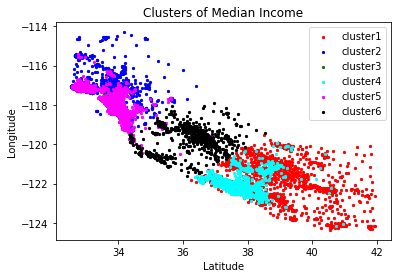

In [34]:
plt.scatter(x[y == 0, 1], x[y == 0, 2], s = 5, c = 'red', label = 'cluster1')
plt.scatter(x[y == 1, 1], x[y == 1, 2], s = 5, c = 'blue', label = 'cluster2')
plt.scatter(x[y == 2, 1], x[y == 2, 2], s = 5, c = 'green', label = 'cluster3')
plt.scatter(x[y == 3, 1], x[y == 3, 2], s = 5, c = 'cyan', label = 'cluster4')
plt.scatter(x[y == 4, 1], x[y == 4, 2], s = 5, c = 'magenta', label = 'cluster5')
plt.scatter(x[y == 5, 1], x[y == 5, 2], s = 5, c = 'black', label = 'cluster6')
plt.title('Clusters of Median Income')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

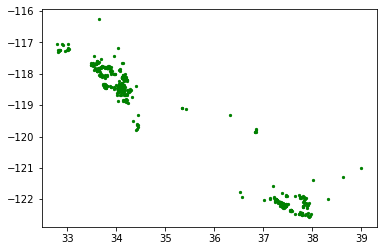

In [37]:
plt.scatter(x[y == 2, 1], x[y == 2, 2], s = 5, c = 'green', label = 'cluster3')